# Linear Regression using PyTorch

- Dataset
- Built-in linear layer
- Built-in cost

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

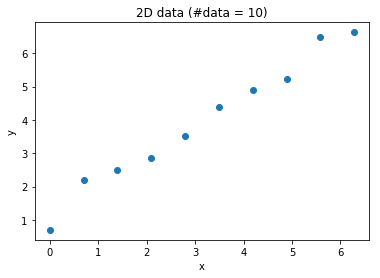

In [10]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [11]:
import torch

## Dataset

In [12]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [13]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([0.]) tensor([0.7019])
1 tensor([0.6981]) tensor([2.1838])
2 tensor([1.3963]) tensor([2.5045])
3 tensor([2.0944]) tensor([2.8669])
4 tensor([2.7925]) tensor([3.5053])
5 tensor([3.4907]) tensor([4.3743])
6 tensor([4.1888]) tensor([4.8843])
7 tensor([4.8869]) tensor([5.2169])
8 tensor([5.5851]) tensor([6.4749])
9 tensor([6.2832]) tensor([6.6290])


## Dataloader

In [14]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [15]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[2.0944],
        [4.8869],
        [4.1888],
        [1.3963]]),
 'label': tensor([[2.8669],
        [5.2169],
        [4.8843],
        [2.5045]])}

batch# = 1
samples: 
{'feature': tensor([[6.2832],
        [2.7925],
        [3.4907],
        [0.6981]]),
 'label': tensor([[6.6290],
        [3.5053],
        [4.3743],
        [2.1838]])}

batch# = 2
samples: 
{'feature': tensor([[0.0000],
        [5.5851]]),
 'label': tensor([[0.7019],
        [6.4749]])}


## Model

In [16]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Setting a model for our problem

In [17]:
input_dim = 1
output_dim = 1

model = MyModel(input_dim, output_dim)

## Cost function

Often called loss or error

In [18]:
cost = nn.MSELoss()

## Minimizing the cost function

In other words training (or learning from data)

In [19]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        predictions = model(samples['feature'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimiser.zero_grad()
        
        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        error.backward()
        
        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 23.942628860473633
	Batch = 1, Error = 12.051015853881836
	Batch = 2, Error = 3.963968515396118
Epoch = 1
	Batch = 0, Error = 3.7029225826263428
	Batch = 1, Error = 2.8917946815490723
	Batch = 2, Error = 1.506568431854248
Epoch = 2
	Batch = 0, Error = 0.5777808427810669
	Batch = 1, Error = 1.989452838897705
	Batch = 2, Error = 0.3369569182395935
Epoch = 3
	Batch = 0, Error = 0.285680890083313
	Batch = 1, Error = 1.497228741645813
	Batch = 2, Error = 0.9357794523239136
Epoch = 4
	Batch = 0, Error = 0.19849467277526855
	Batch = 1, Error = 0.6835261583328247
	Batch = 2, Error = 2.558164596557617
Epoch = 5
	Batch = 0, Error = 1.2457315921783447
	Batch = 1, Error = 0.8883177042007446
	Batch = 2, Error = 0.02108941040933132
Epoch = 6
	Batch = 0, Error = 0.47662273049354553
	Batch = 1, Error = 0.9832525253295898
	Batch = 2, Error = 1.1916348934173584
Epoch = 7
	Batch = 0, Error = 0.8553171753883362
	Batch = 1, Error = 1.0599324703216553
	Batch = 2, Error = 0.1306

## Lets see how well the model has learnt the data

In [32]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(x_for_plotting.T, dtype=torch.float32)
y_for_plotting = model.forward(design_matrix.unsqueeze(1))
print('y_for_plotting shape:', y_for_plotting.shape)

y_for_plotting shape: torch.Size([1000, 1])


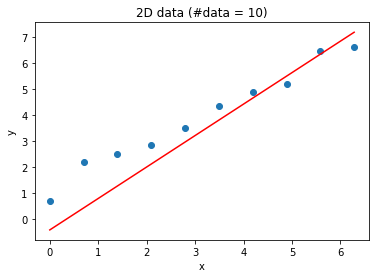

In [33]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()